In [1]:
import pandas as pd
from google.oauth2 import service_account
from google.cloud import bigquery

# Replace with the path to your service account key file
key_path = "your_jason_here.json"

# Authenticate using the service account key
credentials = service_account.Credentials.from_service_account_file(key_path)

# Create a BigQuery client
client = bigquery.Client(credentials=credentials, project=credentials.project_id)

# Buat query SQL
query = """
with product_recommendation as(
SELECT
ori.*,
inv.* except(product_id, id, created_at)
FROM bigquery-public-data.thelook_ecommerce.order_items ori
join bigquery-public-data.thelook_ecommerce.inventory_items inv
on ori.inventory_item_id = inv.id),
test as(
select order_id, user_id, product_id, created_at, inventory_item_id,
sale_price, product_category, product_name, product_brand, product_department, status, sale_price from product_recommendation
where status != 'Cancelled')

SELECT DISTINCT product_category, product_name, product_brand, product_department
FROM product_recommendation;
"""

# Run the query and convert the results to a DataFrame
query_job = client.query(query)
df = query_job.to_dataframe()

df


c:\Users\Vito Muhammad N\AppData\Local\Programs\Python\Python311\Lib\site-packages\google\cloud\bigquery\table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


,product_category,product_name,product_brand,product_department
0,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,Women
1,Accessories,(One) CHEER Rhinestone Studded Stretch Headband,Funny Girl Designs,Women
2,Accessories,(Set of 3) Leopard Animal Print Stretch Headband,Funny Girl Designs,Women
3,Accessories,(Set of 4) 2.5 Glitter Cotton Stretch Headbands,Funny Girl Designs,Women
4,Accessories,1 1/2 In. Original Perry Suspenders,Perry,Men
...,...,...,...,...
28514,Underwear,ck one Men's Cotton Stretch Trunk,Calvin Klein,Men
28515,Underwear,ck one Men's Micro Boxer Brief,Calvin Klein,Men
28516,Underwear,ck one Men's Micro Hip Brief,Calvin Klein,Men
28517,Underwear,ck one Men's Micro Low Rise Trunk,Calvin Klein,Men


## EDA

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
product_gender = df.groupby('product_department').size().reset_index(name='count').sort_values(by='count', ascending=False).rename(columns={'count': 'total_product','product_department':'gender'})
product_gender

,gender,total_product
1,Women,15724
0,Men,12795


In [4]:
total_products = product_gender['total_product'].sum()
product_gender['percentage'] = (product_gender['total_product'] / total_products) * 100
product_gender

,gender,total_product,percentage
1,Women,15724,55.135173
0,Men,12795,44.864827


In [5]:
sum_lk = product_gender[product_gender['gender']=='Men']['total_product'].values[0]
sum_wm = product_gender[product_gender['gender']=='Women']['total_product'].values[0]
percent_lk = product_gender[product_gender['gender']=='Men']['percentage'].values[0]
percent_wm = product_gender[product_gender['gender']=='Women']['percentage'].values[0]

Text(0.5, 1.0, 'Total Product by Gender')

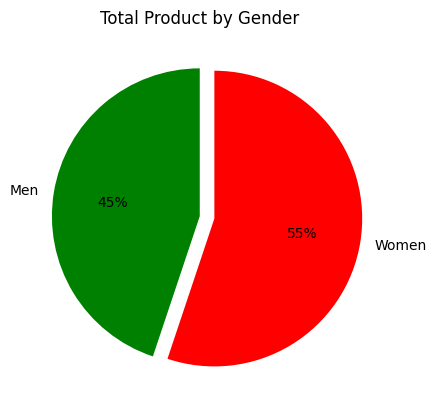

In [6]:
plt.pie(product_gender['total_product'], labels=product_gender['gender'],startangle=90, counterclock=False,explode=[0.1,0.0]
        ,autopct='%.f%%', colors=['red','green'])
plt.title('Total Product by Gender')

In [7]:
print(f"Total produk E-Commerce berdasarkan gender di dominasi oleh perempuan dengan total produk sebanyak {sum_wm} atau sebanyak {percent_wm:.2f}% dari total produk")

Total produk E-Commerce berdasarkan gender di dominasi oleh perempuan dengan total produk sebanyak 15724 atau sebanyak 55.14% dari total produk


In [8]:
product_category = df.groupby('product_category').size().reset_index(name='count').sort_values(by='count', ascending=False).rename(columns={'count': 'total_product'}).reset_index()
product_category

,index,product_category,total_product
0,6,Intimates,2336
1,24,Tops & Tees,1846
2,5,Fashion Hoodies & Sweatshirts,1841
3,7,Jeans,1825
4,23,Swim,1775
5,15,Shorts,1727
6,17,Sleep & Lounge,1719
7,22,Sweaters,1716
8,0,Accessories,1551
9,1,Active,1420


In [9]:
jumlah_kategori = len(product_category.index)
top_3_categories = product_category.head(3)['product_category'].tolist()
top_3_categories_str = ', '.join(top_3_categories)

Text(0.5, 1.0, 'Top 10 of Product Category  listings')

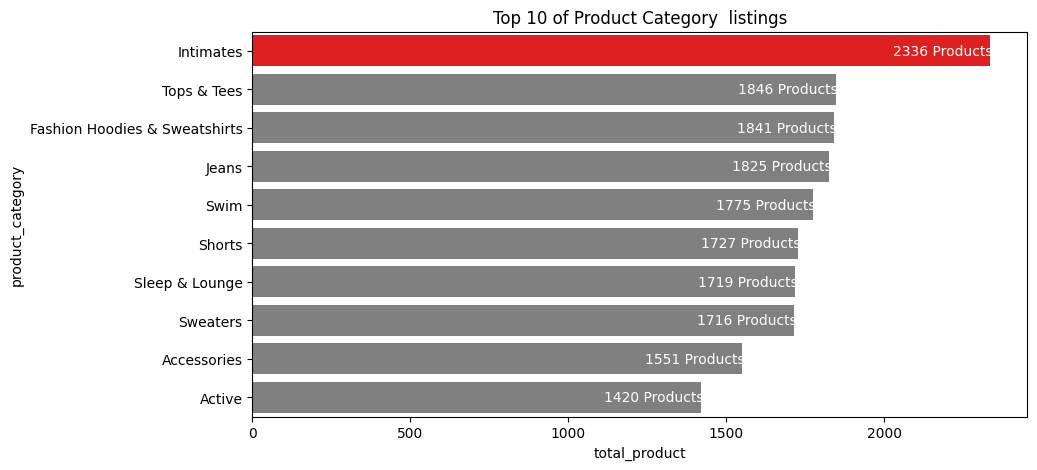

In [10]:
plt.figure(figsize = (10,5))
clrs = ['grey' if (x < max(product_category.total_product)) else 'red' for x in product_category.total_product ]
ax = sns.barplot(data=product_category.head(10),y='product_category',x='total_product',palette=
                 clrs)
for p in ax.patches:
    ax.annotate("%.0f Products" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(-70, 0), textcoords='offset points', ha="left", va="center", color = 'white')
plt.title('Top 10 of Product Category  listings')

In [11]:
# Print the message with a line break
print(f"E-Commerce menjual barang dengan membagi produk menjadi {jumlah_kategori} kategori,\n dimana 3 kategori teringgi berdasarkan jumlah produk yang listing pada E-Commerce yaitu jatuh pada kategori:\n {top_3_categories_str}.")

E-Commerce menjual barang dengan membagi produk menjadi 26 kategori,
 dimana 3 kategori teringgi berdasarkan jumlah produk yang listing pada E-Commerce yaitu jatuh pada kategori:
 Intimates, Tops & Tees, Fashion Hoodies & Sweatshirts.


In [12]:
product_brand = df.groupby('product_brand').size().reset_index(name='count').sort_values(by='count', ascending=False).rename(columns={'count': 'total_product'}).reset_index()
product_brand

,index,product_brand,total_product
0,97,Allegra K,1033
1,448,Calvin Klein,483
2,466,Carhartt,384
3,1082,Hanes,301
4,2587,Volcom,275
...,...,...,...
2751,944,Fredricks of Hollywood,1
2752,2015,Rival,1
2753,939,Fratelli,1
2754,2018,Rivet De Cru Jeans,1


Text(0.5, 1.0, 'Top 10 of Total Product Brand listings')

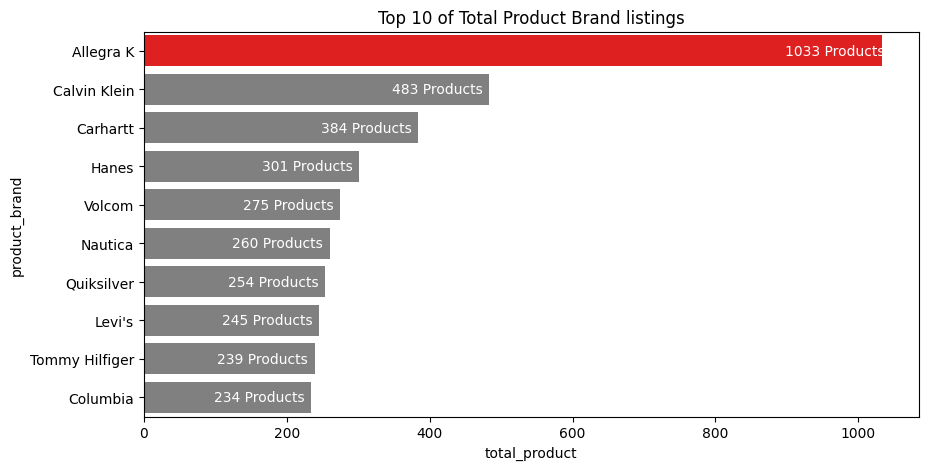

In [13]:
plt.figure(figsize = (10,5))
clrs = ['grey' if (x < max(product_brand.total_product)) else 'red' for x in product_brand.total_product ]
ax = sns.barplot(data=product_brand.head(10),y='product_brand',x='total_product',palette=
                 clrs)
for p in ax.patches:
    ax.annotate("%.0f Products" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(-70, 0), textcoords='offset points', ha="left", va="center", color = 'white')
plt.title('Top 10 of Total Product Brand listings')

In [14]:
jumlah_brand = len(product_brand.index)
top_3_brand = product_brand.head(3)['product_brand'].tolist()
top_3_brand_str = ', '.join(top_3_brand)

In [15]:
# Print the message with a line break
print(f"E-Commerce menjual produk sebanyak {jumlah_brand} brand ,\n dimana 3 brad terbanyak pada E-Commerce yaitu adalah:\n {top_3_brand_str}.")

E-Commerce menjual produk sebanyak 2756 brand ,
 dimana 3 brad terbanyak pada E-Commerce yaitu adalah:
 Allegra K, Calvin Klein, Carhartt.


In [16]:
df.duplicated().sum()

0

# Preprocessing part 1

Tahap pertama:
1. to_lower: Mengubah teks menjadi huruf kecil. Tujuan: Menyamakan format teks tanpa memperhatikan huruf kapital.
2. remove_contraction: Menghilangkan singkatan atau kontraksi. Tujuan: Mengubah singkatan seperti "nggak" menjadi "tidak" agar lebih mudah dianalisis.
3. remove_number: Menghapus angka dari teks. Tujuan: Membersihkan teks dari angka yang tidak relevan.
4. remove_punctuation: Menghapus tanda baca.Tujuan: Mengurangi gangguan dari tanda baca dalam analisis teks.
5. remove_stopwords: Menghapus kata-kata umum (stopwords) seperti "dan", "atau" .Tujuan: Fokus pada kata-kata yang lebih penting dalam analisis.
6. remove_whitespace: Menghapus spasi berlebih. Tujuan: Merapikan teks agar tidak ada spasi yang tidak perlu.

In [17]:
def to_lower(text):
    return text.lower()

product_abbreviation_dict = {
    # Sleep & Lounge
    "pjs": "pajamas",
    "sleepwear": "sleep outfit",
    "nightgown": "night dress",
    "nightshirt": "sleep shirt",
    "loungewear": "lounge outfit",
    "robe": "bathrobe",
    "slippers": "house slippers",
    "sleep pants": "sleeping pants",
    "sleep tee": "sleeping t-shirt",
    "sweatpants": "joggers",
    "sleep shorts": "sleeping shorts",

    # Socks
    "socks": "foot socks",
    "ankle socks": "low-cut socks",
    "crew socks": "mid-calf socks",
    "no-show socks": "hidden socks",
    "knee-high socks": "knee-length socks",
    "compression socks": "pressure socks",

    # Socks & Hosiery
    "hosiery": "legwear",
    "stockings": "leg stockings",
    "tights": "full-length tights",
    "leggings": "footless tights",
    "pantyhose": "sheer tights",
    "thigh-high": "thigh-high stockings",

    # Suits
    "suit": "formal suit",
    "blzr": "blazer",
    "vest": "waistcoat",
    "tux": "tuxedo",
    "suit jacket": "formal jacket",
    "dress pants": "formal pants",
    "trouser": "suit trousers",
    "tailcoat": "formal tailcoat",

    # Suits & Sport Coats
    "sport coat": "sports jacket",
    "casual blazer": "informal blazer",
    "double-breasted": "double-breasted jacket",
    "single-breasted": "single-breasted jacket",
    "dinner jacket": "evening jacket",

    # Sweaters
    "sweater": "knit sweater",
    "turtleneck": "turtleneck sweater",
    "cardi": "cardigan",
    "pullover": "pullover sweater",
    "crewneck": "crewneck sweater",
    "v-neck": "v-neck sweater",
    "sweatshirt": "casual sweater",

    # Swim
    "swim trunks": "swimming shorts",
    "bikini": "two-piece swimsuit",
    "one-piece": "one-piece swimsuit",
    "swim top": "bikini top",
    "board shorts": "surfing shorts",
    "rashguard": "swim shirt",
    "tankini": "tank top swimsuit",

    # Tops & Tees
    "tee": "t-shirt",
    "polo": "polo shirt",
    "blouse": "casual top",
    "tank top": "sleeveless top",
    "crop top": "cropped t-shirt",
    "v-neck tee": "v-neck t-shirt",
    "henley": "collarless shirt",
    "button-up": "button-up shirt",
    "long-sleeve tee": "long-sleeve t-shirt",

    # Underwear
    "boxers": "boxer shorts",
    "briefs": "underwear briefs",
    "trunks": "short briefs",
    "bikini briefs": "low-rise briefs",
    "boxer briefs": "fitted boxer briefs",
    "thong": "thong underwear",
    "panties": "women's underwear",
    "bralette": "light bra",
    "sports bra": "athletic bra",
    "undershirt": "base layer shirt"
}


def remove_contraction(text):
    list_kata = text.split()
    list_hasil = []

    for kata in list_kata:
        if kata in product_abbreviation_dict.keys():
            list_hasil.append(product_abbreviation_dict[kata])
        else:
            list_hasil.append(kata)

    hasil = ' '.join(list_hasil)
    return hasil


def remove_number(text):
    hasil = ''.join([char for char in text if not char.isnumeric()])
    return hasil

from string import punctuation
def remove_punctuation(text):
    hasil = ''.join([char for char in text if not char in punctuation])
    return hasil


import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
nltk.download('punkt')

stop_words = stopwords.words('english')
def remove_stopwords(text):
    hasil = ' '.join([kata for kata in text.split() if kata not in stop_words])
    return hasil

def remove_whitespace(text):
    hasil = ' '.join(text.split())
    return hasil

[nltk_data] Downloading package stopwords to C:\Users\Vito Muhammad
[nltk_data]     N\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Vito Muhammad
[nltk_data]     N\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [18]:
def combine_cleaning(series):
    df['text_clean'] = series.apply(to_lower)
    df['text_clean'] = df['text_clean'].apply(remove_contraction)
    df['text_clean'] = df['text_clean'].apply(remove_number)
    df['text_clean'] = df['text_clean'].apply(remove_punctuation)
    df['text_clean'] = df['text_clean'].apply(remove_stopwords)
    df['text_clean'] = df['text_clean'].apply(remove_whitespace)
    return df

In [19]:
df['gabungan'] = df['product_category'] + df['product_name'] + df['product_brand']+df['product_department']
df

,product_category,product_name,product_brand,product_department,gabungan
0,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,Women,Accessories(ONE) 1 Satin HeadbandFunny Girl De...
1,Accessories,(One) CHEER Rhinestone Studded Stretch Headband,Funny Girl Designs,Women,Accessories(One) CHEER Rhinestone Studded Stre...
2,Accessories,(Set of 3) Leopard Animal Print Stretch Headband,Funny Girl Designs,Women,Accessories(Set of 3) Leopard Animal Print Str...
3,Accessories,(Set of 4) 2.5 Glitter Cotton Stretch Headbands,Funny Girl Designs,Women,Accessories(Set of 4) 2.5 Glitter Cotton Stret...
4,Accessories,1 1/2 In. Original Perry Suspenders,Perry,Men,Accessories1 1/2 In. Original Perry Suspenders...
...,...,...,...,...,...
28514,Underwear,ck one Men's Cotton Stretch Trunk,Calvin Klein,Men,Underwearck one Men's Cotton Stretch TrunkCalv...
28515,Underwear,ck one Men's Micro Boxer Brief,Calvin Klein,Men,Underwearck one Men's Micro Boxer BriefCalvin ...
28516,Underwear,ck one Men's Micro Hip Brief,Calvin Klein,Men,Underwearck one Men's Micro Hip BriefCalvin Kl...
28517,Underwear,ck one Men's Micro Low Rise Trunk,Calvin Klein,Men,Underwearck one Men's Micro Low Rise TrunkCalv...


In [20]:
combine_cleaning(df['gabungan'])

,product_category,product_name,product_brand,product_department,gabungan,text_clean
0,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,Women,Accessories(ONE) 1 Satin HeadbandFunny Girl De...,accessoriesone satin headbandfunny girl design...
1,Accessories,(One) CHEER Rhinestone Studded Stretch Headband,Funny Girl Designs,Women,Accessories(One) CHEER Rhinestone Studded Stre...,accessoriesone cheer rhinestone studded stretc...
2,Accessories,(Set of 3) Leopard Animal Print Stretch Headband,Funny Girl Designs,Women,Accessories(Set of 3) Leopard Animal Print Str...,accessoriesset leopard animal print stretch he...
3,Accessories,(Set of 4) 2.5 Glitter Cotton Stretch Headbands,Funny Girl Designs,Women,Accessories(Set of 4) 2.5 Glitter Cotton Stret...,accessoriesset glitter cotton stretch headband...
4,Accessories,1 1/2 In. Original Perry Suspenders,Perry,Men,Accessories1 1/2 In. Original Perry Suspenders...,accessories original perry suspendersperrymen
...,...,...,...,...,...,...
28514,Underwear,ck one Men's Cotton Stretch Trunk,Calvin Klein,Men,Underwearck one Men's Cotton Stretch TrunkCalv...,underwearck one mens cotton stretch trunkcalvi...
28515,Underwear,ck one Men's Micro Boxer Brief,Calvin Klein,Men,Underwearck one Men's Micro Boxer BriefCalvin ...,underwearck one mens micro boxer briefcalvin k...
28516,Underwear,ck one Men's Micro Hip Brief,Calvin Klein,Men,Underwearck one Men's Micro Hip BriefCalvin Kl...,underwearck one mens micro hip briefcalvin kle...
28517,Underwear,ck one Men's Micro Low Rise Trunk,Calvin Klein,Men,Underwearck one Men's Micro Low Rise TrunkCalv...,underwearck one mens micro low rise trunkcalvi...


# Preprocessing part 2

1. stem(text): Mengubah kata-kata dalam teks menjadi bentuk dasar menggunakan stemming (mengabaikan tata bahasa). Tujuan: Menyederhanakan kata-kata, misalnya "running" jadi "run".
2. lemmatize(text): Mengubah kata-kata dalam teks menjadi bentuk lematiknya yang benar secara tata bahasa. Tujuan: Mendapatkan bentuk kata dasar yang valid, misalnya "better" jadi "good".

In [21]:
from nltk.stem import SnowballStemmer, WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\Vito Muhammad
[nltk_data]     N\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [22]:
stemmer = SnowballStemmer('english')

def stem(text):

    list_hasil = []

    for sentence in nltk.sent_tokenize(text):   # pecah paragraf menjadi kalimat-kalimat
        for word in nltk.word_tokenize(sentence): # pecah kalimat menjadi kata-kata
            list_hasil.append(stemmer.stem(word))   # ubah kata ke kata dasarnya

    hasil = ' '.join(list_hasil)
    return hasil

lemmatizer = WordNetLemmatizer()

def lemmatize(text):

    list_hasil = []

    for sentence in nltk.sent_tokenize(text):   # pecah paragraf menjadi kalimat-kalimat
        for word in nltk.word_tokenize(sentence): # pecah kalimat menjadi kata-kata
            list_hasil.append(lemmatizer.lemmatize(word))   # ubah kata ke kata dasarnya

    hasil = ' '.join(list_hasil)
    return hasil

In [23]:
df['stem'] = df['text_clean'].apply(stem)
df['lemmatize'] = df['text_clean'].apply(lemmatize)

df

,product_category,product_name,product_brand,product_department,gabungan,text_clean,stem,lemmatize
0,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,Women,Accessories(ONE) 1 Satin HeadbandFunny Girl De...,accessoriesone satin headbandfunny girl design...,accessorieson satin headbandfunni girl designs...,accessoriesone satin headbandfunny girl design...
1,Accessories,(One) CHEER Rhinestone Studded Stretch Headband,Funny Girl Designs,Women,Accessories(One) CHEER Rhinestone Studded Stre...,accessoriesone cheer rhinestone studded stretc...,accessorieson cheer rhineston stud stretch hea...,accessoriesone cheer rhinestone studded stretc...
2,Accessories,(Set of 3) Leopard Animal Print Stretch Headband,Funny Girl Designs,Women,Accessories(Set of 3) Leopard Animal Print Str...,accessoriesset leopard animal print stretch he...,accessoriesset leopard anim print stretch head...,accessoriesset leopard animal print stretch he...
3,Accessories,(Set of 4) 2.5 Glitter Cotton Stretch Headbands,Funny Girl Designs,Women,Accessories(Set of 4) 2.5 Glitter Cotton Stret...,accessoriesset glitter cotton stretch headband...,accessoriesset glitter cotton stretch headband...,accessoriesset glitter cotton stretch headband...
4,Accessories,1 1/2 In. Original Perry Suspenders,Perry,Men,Accessories1 1/2 In. Original Perry Suspenders...,accessories original perry suspendersperrymen,accessori origin perri suspendersperrymen,accessory original perry suspendersperrymen
...,...,...,...,...,...,...,...,...
28514,Underwear,ck one Men's Cotton Stretch Trunk,Calvin Klein,Men,Underwearck one Men's Cotton Stretch TrunkCalv...,underwearck one mens cotton stretch trunkcalvi...,underwearck one men cotton stretch trunkcalvin...,underwearck one men cotton stretch trunkcalvin...
28515,Underwear,ck one Men's Micro Boxer Brief,Calvin Klein,Men,Underwearck one Men's Micro Boxer BriefCalvin ...,underwearck one mens micro boxer briefcalvin k...,underwearck one men micro boxer briefcalvin kl...,underwearck one men micro boxer briefcalvin kl...
28516,Underwear,ck one Men's Micro Hip Brief,Calvin Klein,Men,Underwearck one Men's Micro Hip BriefCalvin Kl...,underwearck one mens micro hip briefcalvin kle...,underwearck one men micro hip briefcalvin klei...,underwearck one men micro hip briefcalvin klei...
28517,Underwear,ck one Men's Micro Low Rise Trunk,Calvin Klein,Men,Underwearck one Men's Micro Low Rise TrunkCalv...,underwearck one mens micro low rise trunkcalvi...,underwearck one men micro low rise trunkcalvin...,underwearck one men micro low rise trunkcalvin...


# Preprocessing part 3

1. TfidfVectorizer: Mengubah teks menjadi representasi vektor berbasis TF-IDF (Term Frequency-Inverse Document Frequency). Tujuan: Mengukur pentingnya kata-kata dalam teks, relatif terhadap seluruh dataset.
2. cosine_similarity: Menghitung kesamaan antara dua vektor berdasarkan sudut kosinus. Tujuan: Menentukan seberapa mirip dua teks atau produk berdasarkan konten.

Dipilih Menggunakan TF-IDF (bukan Count Vectorizer) karena lebih efektif untuk analisis recommend:

1. Mengurangi Bobot Kata Umum: TF-IDF mengurangi bobot kata-kata yang sering muncul di semua dokumen (misalnya, kata umum seperti "the" atau "and") yang tidak memberikan banyak informasi.

2. Membuat Kata Unik Lebih Penting: Kata yang jarang muncul tapi penting di dokumen tertentu akan memiliki bobot lebih tinggi, membantu dalam menangkap arti spesifik teks.

3. Lebih Relevan untuk Similarity: TF-IDF lebih baik dalam mengukur kesamaan antara teks karena fokus pada kata-kata yang benar-benar membedakan dokumen satu dengan yang lain.

Sedangkan Count Vectorizer hanya menghitung frekuensi kemunculan kata, tanpa mempertimbangkan kepentingan relatif kata tersebut di seluruh dokumen.

In [24]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [25]:
from nltk.tokenize import word_tokenize
tf = TfidfVectorizer(stop_words='english', tokenizer=word_tokenize)
tfidf_matrix = tf.fit_transform(df['gabungan'])

c:\Users\Vito Muhammad N\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [26]:
from sklearn.metrics.pairwise import cosine_distances
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

## 3 Rekomendasi Product

In [27]:
df.head()

,product_category,product_name,product_brand,product_department,gabungan,text_clean,stem,lemmatize
0,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,Women,Accessories(ONE) 1 Satin HeadbandFunny Girl De...,accessoriesone satin headbandfunny girl design...,accessorieson satin headbandfunni girl designs...,accessoriesone satin headbandfunny girl design...
1,Accessories,(One) CHEER Rhinestone Studded Stretch Headband,Funny Girl Designs,Women,Accessories(One) CHEER Rhinestone Studded Stre...,accessoriesone cheer rhinestone studded stretc...,accessorieson cheer rhineston stud stretch hea...,accessoriesone cheer rhinestone studded stretc...
2,Accessories,(Set of 3) Leopard Animal Print Stretch Headband,Funny Girl Designs,Women,Accessories(Set of 3) Leopard Animal Print Str...,accessoriesset leopard animal print stretch he...,accessoriesset leopard anim print stretch head...,accessoriesset leopard animal print stretch he...
3,Accessories,(Set of 4) 2.5 Glitter Cotton Stretch Headbands,Funny Girl Designs,Women,Accessories(Set of 4) 2.5 Glitter Cotton Stret...,accessoriesset glitter cotton stretch headband...,accessoriesset glitter cotton stretch headband...,accessoriesset glitter cotton stretch headband...
4,Accessories,1 1/2 In. Original Perry Suspenders,Perry,Men,Accessories1 1/2 In. Original Perry Suspenders...,accessories original perry suspendersperrymen,accessori origin perri suspendersperrymen,accessory original perry suspendersperrymen


In [57]:
from fuzzywuzzy import process  # Import fuzzy matching library

def recommend_products(input_product_name, df, cosine_sim):
    # Gunakan fuzzy matching untuk menemukan nama produk terdekat
    closest_match = process.extractOne(input_product_name, df['lemmatize'].tolist())
    if closest_match:
        product_name = closest_match[0]  # Ambil nama produk terdekat

        # Ambil index dari produk yang cocok dengan nama produk terdekat
        idx = df[df['lemmatize'] == product_name].index[0]

        # Ambil skor kesamaan untuk produk ini dengan semua produk lain
        sim_scores = list(enumerate(cosine_sim[idx]))

        # Urutkan produk berdasarkan skor kesamaan (menurun) dan kecualikan produk input itu sendiri
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        sim_scores = sim_scores[1:4]  # Ambil 3 produk paling mirip

        # Ambil index produk
        product_indices = [i[0] for i in sim_scores]

        # Kembalikan 3 produk paling mirip
        print(f"Input product: '{input_product_name}' matched with '{product_name}'")
        return df.iloc[product_indices][['product_category', 'product_name', 'product_brand', 'product_department']]
    else:
        return "No matching product found."

In [59]:
# Example usage
recommendations = recommend_products('women levis', df, cosine_sim)
recommendations

Input product: 'women levis' matched with 'jeanslevi woman plus size flare jeanleviswomen'


,product_category,product_name,product_brand,product_department
15463,Plus,Levi Women's Plus Size Flare Jean,Levi's,Women
9628,Jeans,Levi's Juniors Geo Super Flare Jean,Levi's,Women
9720,Jeans,Levi's Women's Petite Skinny Jean,Levi's,Women


In [33]:
# import joblib
# from scipy import sparse

# # Save the TF-IDF Vectorizer and Matrix
# joblib.dump(tf, 'tfidf_vectorizer.pkl')
# sparse.save_npz('tfidf_matrix.npz', tfidf_matrix)